In [305]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pharma_complete = pd.merge(clinical_data,drug_data, how="left", on="Mouse ID")
pharma_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [285]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
displayColumns=[
      'Drug',
      'Timepoint',
      'Tumor Volume (mm3)']

pharma_tumor_mean=pd.DataFrame(pharma_complete.groupby(["Drug","Timepoint"],as_index = False).mean())[displayColumns]
pharma_tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [286]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
pharma_tumor_mean_sem=pd.DataFrame(pharma_complete.groupby(["Drug","Timepoint"])[['Tumor Volume (mm3)']].sem())
pharma_tumor_mean_sem.reset_index(inplace=True)
pharma_tumor_mean_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [302]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot=pharma_tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


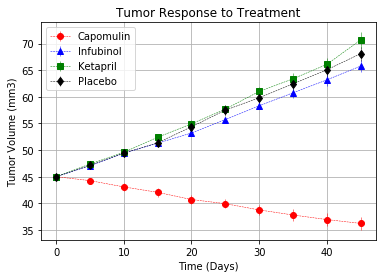

In [288]:
# Generate the Plot (with Error Bars)
listLegend=['Capomulin','Infubinol','Ketapril','Placebo']

plt.errorbar(tumor_pivot.index,tumor_pivot['Capomulin'], \
             yerr=pharma_tumor_mean_sem[pharma_tumor_mean_sem['Drug']=='Capomulin']['Tumor Volume (mm3)'],fmt="ro--",linewidth=0.5)
plt.errorbar(tumor_pivot.index,tumor_pivot['Infubinol'],\
             yerr=pharma_tumor_mean_sem[pharma_tumor_mean_sem['Drug']=='Infubinol']['Tumor Volume (mm3)'], fmt="b^--",linewidth=0.5)
plt.errorbar(tumor_pivot.index,tumor_pivot['Ketapril'],\
             yerr=pharma_tumor_mean_sem[pharma_tumor_mean_sem['Drug']=='Ketapril']['Tumor Volume (mm3)'], fmt="gs--",linewidth=0.5)
plt.errorbar(tumor_pivot.index,tumor_pivot['Placebo'],\
             yerr=pharma_tumor_mean_sem[pharma_tumor_mean_sem['Drug']=='Placebo']['Tumor Volume (mm3)'], fmt="kd--",linewidth=0.5)


# Create a legend for our chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
# Show the chart
plt.grid()
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")


## Metastatic Response to Treatment

In [289]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
pharma_metastatic_mean=pd.DataFrame(pharma_complete.groupby(["Drug","Timepoint"]).mean())[['Metastatic Sites']]
pharma_metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [290]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pharma_metastatic_sem=pd.DataFrame(pharma_complete.groupby(["Drug","Timepoint"])[['Metastatic Sites']].sem())
pharma_metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [291]:
# Minor Data Munging to Re-Format the Data Frames
pharma_metastatic_mean.reset_index(inplace=True)
metastatic_pivot=pharma_metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


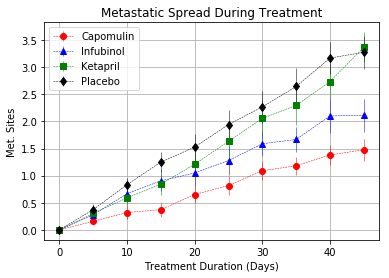

In [292]:

# Generate the Plot (with Error Bars)
listLegend=['Capomulin','Infubinol','Ketapril','Placebo']

plt.errorbar(metastatic_pivot.index,metastatic_pivot['Capomulin'], \
             yerr=pharma_metastatic_sem.loc['Capomulin']['Metastatic Sites'],fmt="ro--",linewidth=0.5)
plt.errorbar(metastatic_pivot.index,metastatic_pivot['Infubinol'],\
             yerr=pharma_metastatic_sem.loc['Infubinol']['Metastatic Sites'], fmt="b^--",linewidth=0.5)
plt.errorbar(metastatic_pivot.index,metastatic_pivot['Ketapril'],\
             yerr=pharma_metastatic_sem.loc['Ketapril']['Metastatic Sites'], fmt="gs--",linewidth=0.5)
plt.errorbar(metastatic_pivot.index,metastatic_pivot['Placebo'],\
             yerr=pharma_metastatic_sem.loc['Placebo']['Metastatic Sites'], fmt="kd--",linewidth=0.5)


# Create a legend for our chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="best")
# Show the chart
plt.grid()
# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")

## Survival Rates

In [293]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
displayColumns=[
      'Drug',
      'Timepoint',
      'Mouse ID']

df_mice_count=pd.DataFrame(pharma_complete.groupby(["Drug","Timepoint"],as_index = False).count())[displayColumns].rename(columns={'Mouse ID': 'Mouse Count'})
df_mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [294]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot=df_mice_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
mice_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


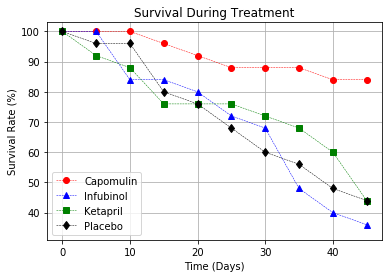

In [351]:
# Generate the Plot (Accounting for percentages)
listLegend=['Capomulin','Infubinol','Ketapril','Placebo']

plt.plot(mice_pivot.index,100 * mice_pivot['Capomulin'] / max(mice_pivot['Capomulin']),"ro--",linewidth=0.5)
plt.plot(mice_pivot.index,100 * mice_pivot['Infubinol'] / max(mice_pivot['Infubinol']), "b^--",linewidth=0.5)
plt.plot(mice_pivot.index,100 * mice_pivot['Ketapril'] / max(mice_pivot['Ketapril']), "gs--",linewidth=0.5)
plt.plot(mice_pivot.index,100 * mice_pivot['Placebo'] / max(mice_pivot['Placebo']), "kd--",linewidth=0.5)

# Create a legend for our chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")

plt.ylim(31,103)
plt.grid()
# Save the Figure
plt.savefig("Survival During Treatment.png")

## Summary Bar Graph

In [309]:
tumor_pivot.pct_change()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.016309,0.033401,0.045822,0.053093,0.039913,0.047235,0.049977,-0.023448,0.056166,0.041152
10,-0.026698,0.038322,0.049762,0.046278,0.040561,0.048758,0.039209,-0.032152,0.040743,0.039231
15,-0.023674,0.037463,0.038306,0.056829,0.045977,0.039180,0.040035,-0.024379,0.041759,0.042908
20,-0.032046,0.041182,0.037065,0.048110,0.053228,0.058503,0.044636,-0.030286,0.049253,0.047092
25,-0.019078,0.040850,0.047325,0.050219,0.057562,0.057357,0.040441,-0.031413,0.038817,0.042554
30,-0.029299,0.045717,0.046381,0.057482,0.049840,0.040473,0.048505,-0.006957,0.065175,0.041142
35,-0.024568,0.036252,0.041905,0.038974,0.052478,0.043665,0.037010,-0.032327,0.043692,0.041166
40,-0.022710,0.044883,0.039846,0.042557,0.046513,0.042167,0.044662,-0.023441,0.046695,0.047052


In [338]:
# Calculate the percent changes for each drug
tumor_change = ((tumor_pivot.loc[45, :] - tumor_pivot.loc[0, :])/tumor_pivot.loc[0, :] * 100)[['Capomulin','Infubinol','Ketapril','Placebo']]
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

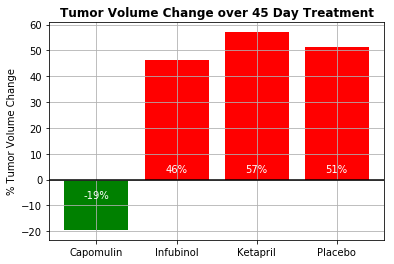

In [350]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
#drug names as labels
xlabels = tumor_change.index
plt.xticks(np.arange(len(xlabels)), xlabels)

#graphs % change of tumor as bar graph
change_plt=plt.bar(np.arange(4), 
        tumor_change,
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
# Show the Figure
plt.grid()
#plt.show()
plt.savefig("Tumor Volume Change over 45 Day Treatment.png")